In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
set = pd.read_excel("modified_2.xlsx")
set

,fw,He,Rad,freq,s11
0,2.5,3.0,6.0,2.000000,-6.273927
1,2.5,3.0,6.0,2.035556,-11.259256
2,2.5,3.0,6.0,2.071111,-13.584587
3,2.5,3.0,6.0,2.106667,-3.810306
4,2.5,3.0,6.0,2.142222,-2.167448
...,...,...,...,...,...
262139,3.0,4.5,9.0,5.840000,-9.289045
262140,3.0,4.5,9.0,5.875556,-8.890133
262141,3.0,4.5,9.0,5.911111,-8.501626
262142,3.0,4.5,9.0,5.946667,-8.119610


In [3]:
set.shape

(262144, 5)

In [4]:
set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   fw      262144 non-null  float64
 1   He      262144 non-null  float64
 2   Rad     262144 non-null  float64
 3   freq    262144 non-null  float64
 4   s11     262144 non-null  float64
dtypes: float64(5)
memory usage: 10.0 MB


In [5]:
set.describe()

,fw,He,Rad,freq,s11
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,2.738602,4.461611,7.997201,3.999996,-12.125988
std,0.152186,0.933724,1.223889,1.157267,7.653804
min,2.500000,3.000000,6.000000,2.000000,-79.248164
25%,2.600000,3.750000,7.000000,2.995556,-16.656531
50%,2.750000,4.500000,8.000000,4.000000,-10.483122
75%,2.850000,5.250000,9.000000,5.004444,-5.800364
max,3.000000,6.000000,10.000000,6.000000,-1.729233


Text(0, 0.5, 'dB')

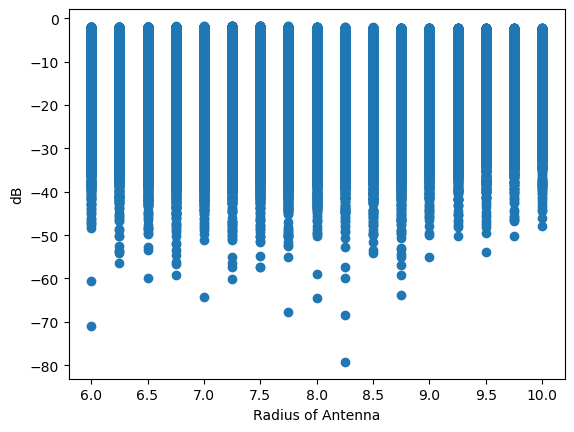

In [6]:
plt.scatter(x = 'Rad', y = 's11', data = set)
plt.xlabel('Radius of Antenna')
plt.ylabel('dB')

Text(0, 0.5, 'dB')

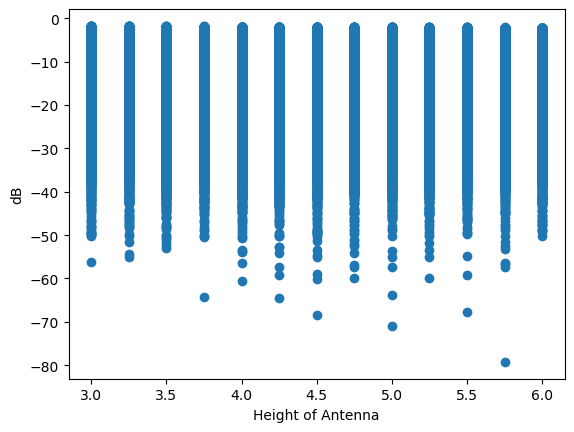

In [7]:
plt.scatter(x = 'He', y = 's11', data = set)
plt.xlabel('Height of Antenna')
plt.ylabel('dB')

Text(0, 0.5, 'dB')

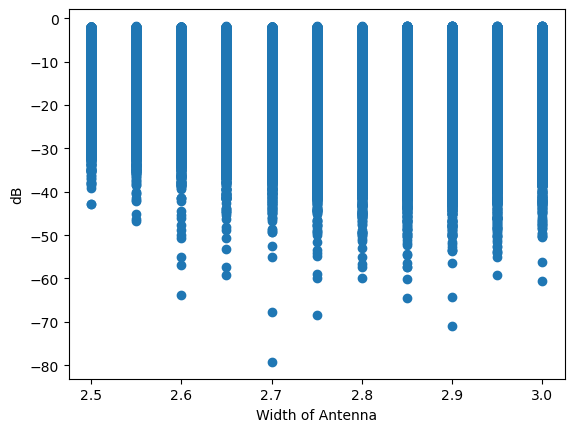

In [8]:
plt.scatter(x = 'fw', y = 's11', data = set)
plt.xlabel('Width of Antenna')
plt.ylabel('dB')

Text(0, 0.5, 'dB')

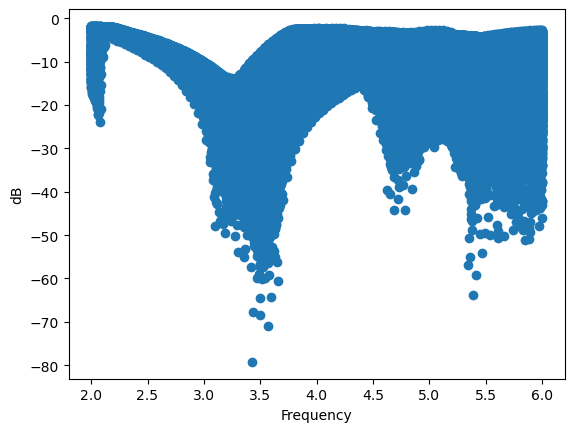

In [9]:
plt.scatter(x = 'freq', y = 's11', data = set)
plt.xlabel('Frequency')
plt.ylabel('dB')

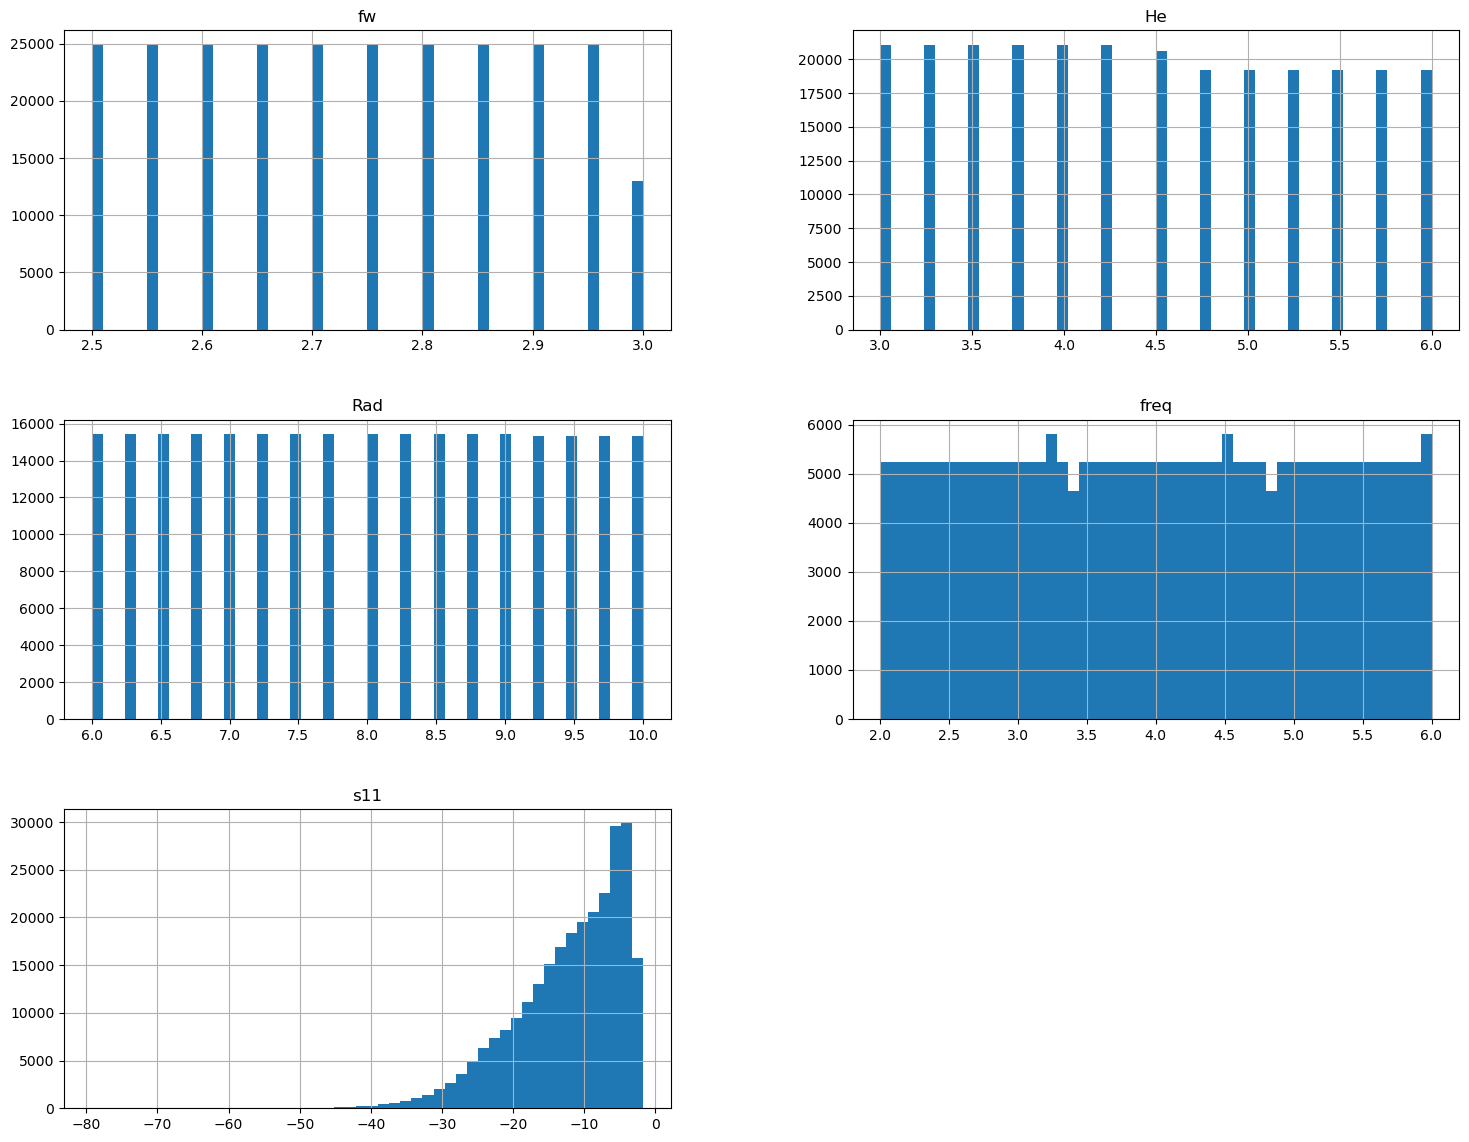

In [10]:
set.hist(bins=50, figsize=(18,14))
plt.show()

In [11]:
set_correlation = set.corr()
set_correlation

,fw,He,Rad,freq,s11
fw,1.000000e+00,-0.070613,-0.003922,8.398197e-07,-0.067817
He,-7.061284e-02,1.000000,-0.000102,-9.001064e-06,0.000997
Rad,-3.922079e-03,-0.000102,1.000000,1.345067e-06,0.034435
freq,8.398197e-07,-0.000009,0.000001,1.000000e+00,-0.091407
s11,-6.781665e-02,0.000997,0.034435,-9.140693e-02,1.000000


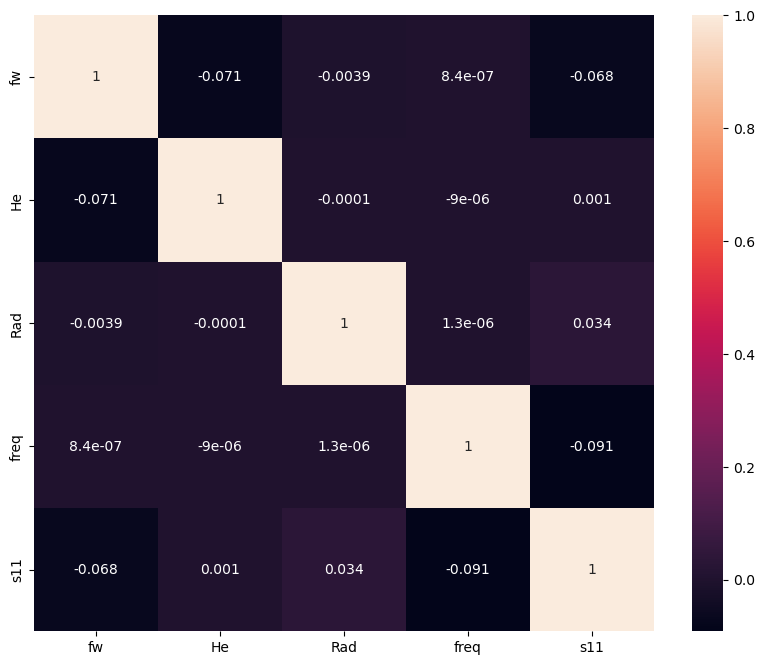

In [12]:
plt.subplots(figsize=(10, 8))
sns.heatmap(set_correlation, annot=True)
plt.show()

In [13]:
x=set.drop(['s11'], axis=1)
y=set['s11']
print(x.head())
print('\n')
print(y.head())

    fw   He  Rad      freq
0  2.5  3.0  6.0  2.000000
1  2.5  3.0  6.0  2.035556
2  2.5  3.0  6.0  2.071111
3  2.5  3.0  6.0  2.106667
4  2.5  3.0  6.0  2.142222


0    -6.273927
1   -11.259256
2   -13.584587
3    -3.810306
4    -2.167448
Name: s11, dtype: float64


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)
x_train

,fw,He,Rad,freq
257753,3.00,4.00,8.00,2.231111
15456,2.50,5.00,6.25,2.328889
210053,2.90,4.25,8.25,6.000000
133660,2.75,4.00,9.00,3.822222
198006,2.85,6.00,7.25,2.604444
...,...,...,...,...
207736,2.90,4.00,7.50,3.795556
91351,2.65,5.00,8.75,2.835556
11157,2.50,4.25,9.25,5.822222
121567,2.70,5.75,7.75,2.800000


In [15]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [16]:
print('Linear Regression training accuracy: ', linear_regression.score(x_train, y_train))

Linear Regression training accuracy:  0.014131332992780576


In [17]:
print('Linear Regression testing accuracy: ', linear_regression.score(x_test, y_test))

Linear Regression testing accuracy:  0.01414833075052957


In [18]:
y_pred = linear_regression.predict(x_train)
limited_predictions = y_pred[:52429]
print(y_pred)

[-11.91970284 -10.70547277 -13.82369736 ... -12.14687127 -11.36895947
 -13.18257994]


In [20]:
print('Linear Regression')
r2= r2_score(y_test, limited_predictions)
print("R2_score", r2)
mse= mean_squared_error(y_test, limited_predictions)
print("MSE", mse)
# accuracies = cross_val_score(estimator = linear_regression, X = x_train, y = y_train)
# print(accuracies.mean())
# print(accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : limited_predictions})
print(set_y.sample(10))

Linear Regression
R2_score -0.014453245623178956
MSE 59.355963556881406
           y_test     y_pred
12490   -3.939709 -13.812849
260222  -9.552725 -13.299371
177825  -7.463220 -12.397819
207182 -17.498614 -11.933933
73228  -17.318941 -11.715874
151792 -13.270137 -13.003470
208807  -5.895756 -12.393854
190129 -17.103408 -11.863084
222042 -21.491813 -12.402650
209730  -6.511727 -12.012957


In [21]:
Lasso_regression = Lasso(alpha=0.2, max_iter = 10000) 
Lasso_regression.fit(x_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [22]:
print('Lasso regression training accuracy: ', Lasso_regression.score(x_train, y_train)) 

Lasso regression training accuracy:  0.008666831238981598


In [23]:
print('Lasso Regression testing accuracy: ', Lasso_regression.score(x_test, y_test))

Lasso Regression testing accuracy:  0.008378499759102986


In [24]:
y_pred = Lasso_regression.predict(x_test)
y_pred

array([-12.38173865, -12.23477968, -12.58078036, ..., -12.84600356,
       -12.44591678, -11.88777733])

In [25]:
print('Lasso Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = Lasso_regression, X = x_train, y = y_train)
# print("accuracies mean", accuracies.mean())
# print("accuracies standard deviation", accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

Lasso Regression
R2_score 0.008378499759102986
MSE 58.020071289102994
           y_test     y_pred
84071  -10.955893 -12.259790
5047    -3.802751 -12.568105
139109  -3.841803 -12.625876
173909 -14.582213 -11.915992
49802  -21.535697 -12.331237
16140   -6.097858 -11.505672
240313 -34.884544 -11.949613
8845   -17.742521 -11.990883
126281  -2.528597 -11.080095
49116   -7.911655 -12.303884


In [26]:
Ridge_regression= Ridge(alpha=1.0) 
Ridge_regression.fit(x_train, y_train)

Ridge()

In [27]:
print('Ridge regression training accuracy: ', Ridge_regression.score(x_train, y_train))

Ridge regression training accuracy:  0.014131332800696783


In [28]:
print('Ridge Regression testing accuracy: ', Ridge_regression.score(x_test, y_test))

Ridge Regression testing accuracy:  0.014148228854837464


In [29]:
y_pred = Ridge_regression.predict(x_test)
y_pred

array([-12.13343904, -11.71424543, -12.17887824, ..., -13.4696486 ,
       -12.35230333, -12.382298  ])

In [30]:
print('Ridge Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = Ridge_regression, X = x_train, y = y_train)
# print("Accuracies mean ",accuracies.mean())
# print("Accuracies standard ",accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

Ridge Regression
R2_score 0.014148228854837464
MSE 57.68248270981946
           y_test     y_pred
149893 -26.458894 -12.379544
31257   -9.262243 -10.957276
111700  -9.517555 -12.673046
179830  -8.574721 -13.280821
210047 -13.623713 -13.694122
1525    -6.967093 -11.060503
170488  -5.561211 -10.939648
49857   -6.864919 -11.289384
73197   -8.420610 -11.251858
45252  -34.353177 -11.051643


In [31]:
SGD_regression= SGDRegressor(max_iter = 2000) 
SGD_regression.fit(x_train, y_train)

SGDRegressor(max_iter=2000)

In [32]:
print('SGD regression training accuracy: ', SGD_regression.score(x_train, y_train)) 

SGD regression training accuracy:  0.0003435828721275458


In [33]:
print('SGD regression testing accuracy: ', SGD_regression.score(x_test, y_test)) 

SGD regression testing accuracy:  0.00016858922104445728


In [34]:
y_pred = SGD_regression.predict(x_test)
print(y_pred)

[-12.95086711 -12.51497223 -13.06373357 ... -14.29253612 -13.15077808
 -13.27965493]


In [35]:
print('SGD Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = SGD_regression, X = x_train, y = y_train)
# print("Accuracies mean ",accuracies.mean())
# print("Accuracies standard ",accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

SGD Regression
R2_score 0.00016858922104445728
MSE 58.500435616197144
           y_test     y_pred
202674  -9.804559 -13.348317
169231 -13.634957 -14.540806
16007  -17.704193 -13.480624
17488   -4.222892 -11.653554
109883 -14.069876 -13.136467
218462 -11.278648 -13.551391
220795 -15.991295 -13.421176
59828  -12.171261 -12.997587
30080   -8.839146 -12.774523
246878  -6.249234 -13.971014


In [36]:
dt_regression = DecisionTreeRegressor()
dt_regression.fit(x_train, y_train)

DecisionTreeRegressor()

In [37]:
print('Decision Tree regression training accuracy: ', dt_regression.score(x_train, y_train))

Decision Tree regression training accuracy:  1.0


In [38]:
print('Decision Tree regression testing accuracy: ', dt_regression.score(x_test, y_test))

Decision Tree regression testing accuracy:  0.9602167371913859


In [39]:
y_pred = dt_regression.predict(x_test)
print(y_pred)

[-15.7841111  -11.19343132 -11.16543592 ...  -8.92628215 -23.11256345
 -29.85045611]


In [40]:
print('Decision Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = dt_regression, X = x_train, y = y_train)
# print("Accuracies mean ",accuracies.mean())
# print("Accuracies standard ",accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

Decision Regression
R2_score 0.9602167371913859
MSE 2.3277306348321076
           y_test     y_pred
152875 -16.214666 -15.355863
113287  -7.222383  -7.308891
87372  -19.425528 -23.028726
118466 -14.334191 -14.259665
165540  -9.679886 -10.058069
250677 -20.503429 -19.928462
160124  -7.938212  -7.750252
234629 -23.959233 -19.255928
239529  -7.158460  -6.642394
98178   -6.441020  -6.619418


In [41]:
rf_regression = RandomForestRegressor()
rf_regression.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
print('Random forest regression training accuracy: ', rf_regression.score(x_train, y_train)) 

Random forest regression training accuracy:  0.9973167605114428


In [43]:
print('Random forest regression testing accuracy: ', rf_regression.score(x_test, y_test)) 

Random forest regression testing accuracy:  0.9809749204760172


In [44]:
y_pred = rf_regression.predict(x_test)
print(y_pred)

[-15.75263166 -11.36441941 -11.38125153 ...  -9.03228998 -22.87962322
 -31.20433389]


In [45]:
print('Random forest Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = rf_regression, X = x_train, y = y_train)
# print("Accuracies mean ",accuracies.mean())
# print("Accuracies standard ",accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

Random forest Regression
R2_score 0.9809749204760172
MSE 1.1131631070869088
           y_test     y_pred
213567  -7.843730  -7.974642
14617   -7.380968  -7.613121
30106   -2.547428  -2.550504
227315  -4.925154  -4.945492
153176  -2.741376  -2.772829
141988 -19.281938 -20.190522
181672 -18.256514 -18.719062
76324  -10.302245  -9.689909
62407  -15.016949 -14.950335
201347  -6.667952  -6.737381


In [46]:
gb_regression = GradientBoostingRegressor()
gb_regression.fit(x_train, y_train)

GradientBoostingRegressor()

In [47]:
print('Gradient Boosting regression training accuracy: ', gb_regression.score(x_train, y_train)) 

Gradient Boosting regression training accuracy:  0.7978709802278068


In [48]:
print('Gradient Boosting regression testing accuracy: ', gb_regression.score(x_test, y_test)) 

Gradient Boosting regression testing accuracy:  0.7976943954247379


In [49]:
y_pred = gb_regression.predict(x_test)
print(y_pred)

[-13.27402874 -10.73493986 -10.43494472 ... -10.29881126 -13.95905414
 -29.92702264]


In [50]:
print('Gradient Boosting Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = gb_regression, X = x_train, y = y_train)
# print("Accuracies mean ",accuracies.mean())
# print("Accuracies standard ",accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

Gradient Boosting Regression
R2_score 0.7976943954247379
MSE 11.836961579383162
           y_test     y_pred
172546 -25.208373 -27.833127
132845 -10.839800 -11.029579
165492  -5.331613  -7.264507
225281  -3.492107  -3.816751
125121  -8.825965  -8.318296
174788  -9.939594 -11.423212
174091  -3.895563  -4.389981
201239 -11.841053 -12.810070
57786  -16.226985 -14.746001
98212   -3.591802  -2.713910


In [51]:
lgbm_regression = LGBMRegressor()
lgbm_regression.fit(x_train, y_train)

LGBMRegressor()

In [52]:
print('light Gradient Boosting regression training accuracy: ', lgbm_regression.score(x_train, y_train)) 

light Gradient Boosting regression training accuracy:  0.9604768988595501


In [53]:
print('light Gradient Boosting regression testing accuracy: ', lgbm_regression.score(x_test, y_test)) 

light Gradient Boosting regression testing accuracy:  0.9600876236362589


In [54]:
y_pred = lgbm_regression.predict(x_test)
print(y_pred)

[-18.4892507   -9.69684454 -10.88448468 ...  -7.71613759 -20.77463723
 -30.59008803]


In [55]:
print('Light Gradient Boosting Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = lgbm_regression, X = x_train, y = y_train)
# print("Accuracies mean ",accuracies.mean())
# print("Accuracies standard ",accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

Light Gradient Boosting Regression
R2_score 0.9600876236362589
MSE 2.3352851076536836
           y_test     y_pred
109803  -4.344311  -4.378104
29494  -12.212610 -13.076397
120837  -8.269849  -8.219358
206436 -12.760016 -12.899615
81344  -19.369062 -19.538363
167788  -6.751343  -6.686721
201838  -6.027870  -6.047271
175742  -4.773361  -5.431665
203665 -22.787631 -24.053224
173936  -6.106614  -7.608574


In [56]:
xgb_regression = XGBRegressor()
xgb_regression.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
print('extreme Gradient Boosting regression training accuracy: ', xgb_regression.score(x_train, y_train)) 

extreme Gradient Boosting regression training accuracy:  0.9761928591904504


In [58]:
print('extreme Gradient Boosting regression testing accuracy: ', xgb_regression.score(x_test, y_test)) 

extreme Gradient Boosting regression testing accuracy:  0.9743147180132679


In [59]:
y_pred = xgb_regression.predict(x_test)
print(y_pred)

[-16.281935 -11.362837 -10.955513 ...  -8.689303 -21.267193 -31.061638]


In [60]:
print('extreme Gradient Boosting Regression')
r2= r2_score(y_test, y_pred)
print("R2_score", r2)
mse= mean_squared_error(y_test, y_pred)
print("MSE", mse)
# accuracies = cross_val_score(estimator = xgb_regression, X = x_train, y = y_train)
# print("Accuracies mean ",accuracies.mean())
# print("Accuracies standard ",accuracies.std())
set_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
print(set_y.sample(10))

extreme Gradient Boosting Regression
R2_score 0.9743147180132679
MSE 1.50285355005804
           y_test     y_pred
75471  -24.525116 -25.073381
137696 -15.695681 -15.715172
15339   -2.504392  -2.239562
95660   -6.478290  -6.361631
207100  -5.958483  -5.657641
123299 -12.008838 -13.275680
138880  -5.303150  -5.296482
837    -19.956539 -21.082424
164228  -9.663987 -10.003082
78980  -17.750691 -18.135517


In [61]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    # 'min_samples_leaf': [3, 4, 5],
    # 'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, verbose = 2)
# Fit the grid search to the datas
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=100; total time=  20.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=100; total time=  19.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=100; total time=  19.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=200; total time=  40.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=200; total time=  39.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=200; total time=  40.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=300; total time= 1.0min
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=300; total time= 1.0min
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=300; total time= 1.0min
[CV] END bootstrap=True, max_depth=80, max_features=2, n_estimators=1000; total time=22.7min
[CV] END bootstrap

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [63]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'n_estimators': 1000}

In [64]:
result_dataframe = pd.DataFrame(grid_search.cv_results_)
result_dataframe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,18.478439,0.051674,1.536112,0.007378,True,80,2,100,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.981858,0.981981,0.981278,0.981706,0.000307,15
1,37.332299,0.435606,3.082609,0.026551,True,80,2,200,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.982342,0.982491,0.981322,0.982052,0.000520,8
2,55.823255,0.082809,4.776392,0.068554,True,80,2,300,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.982293,0.982459,0.981478,0.982077,0.000429,7
3,196.388380,0.594756,829.078798,238.091417,True,80,2,1000,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.982490,0.982562,0.981515,0.982189,0.000477,1
4,23.504805,0.929207,1.603777,0.019532,True,80,3,100,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.981045,0.981702,0.980138,0.980962,0.000641,31
5,45.713823,0.216966,3.150269,0.058871,True,80,3,200,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.981150,0.981738,0.980233,0.981040,0.000619,28
6,67.363243,0.412162,4.754372,0.030012,True,80,3,300,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.981174,0.981728,0.980330,0.981077,0.000575,26
7,238.339502,3.299726,666.063478,21.978166,True,80,3,1000,"{'bootstrap': True, 'max_depth': 80, 'max_feat...",0.981286,0.981850,0.980340,0.981159,0.000623,19
8,19.676179,1.089566,1.587533,0.031380,True,90,2,100,"{'bootstrap': True, 'max_depth': 90, 'max_feat...",0.982102,0.982158,0.981147,0.981802,0.000464,13
9,37.275020,0.266423,3.244143,0.036739,True,90,2,200,"{'bootstrap': True, 'max_depth': 90, 'max_feat...",0.982248,0.982411,0.981331,0.981997,0.000475,11


In [65]:
result_dataframe[['param_max_depth','param_max_features','param_n_estimators','mean_test_score']]

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,80,2,100,0.981706
1,80,2,200,0.982052
2,80,2,300,0.982077
3,80,2,1000,0.982189
4,80,3,100,0.980962
5,80,3,200,0.981040
6,80,3,300,0.981077
7,80,3,1000,0.981159
8,90,2,100,0.981802
9,90,2,200,0.981997


In [66]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=2, n_estimators=1000)

In [67]:
print(dir(grid_search),'\n')
print('best score = ',grid_search.best_score_)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_validate_data', '_validate_params', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'feature_names_in_', 'fit', 'get_params', 'inverse_transform', 'multimetric_', 'n_features_in_', 'n_jobs', 'n_splits_', 'pa

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap= True, max_depth= 90, max_features= 2, n_estimators= 500)
rf.fit(x_train , y_train)

RandomForestRegressor(max_depth=90, max_features=2, n_estimators=500)

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = rf.score(x_train, y_train)
print("Training score RandomForestRegressor with n_estimators = 1000: ", score)

y_pred = rf.predict(x_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score RandomForestRegressor with n_estimators = 1000: ", r_score)

mse = mean_squared_error(y_test, y_pred)
print("mse value : ", mse)


Training score RandomForestRegressor with n_estimators = 1000:  0.9978323247513
Testing Score RandomForestRegressor with n_estimators = 1000:  0.9845985245336283
mse value :  0.9011449472396238


In [70]:
from sklearn.neighbors import KNeighborsRegressor

k_range = range(1,31)
df = pd.DataFrame(columns = ['K', 'MSE','train_acc','test_acc'])
for K in k_range:
    knn = KNeighborsRegressor(n_neighbors = K)
    knn.fit(x_train ,y_train)
    train_accuracies = knn.score(x_train,y_train)
    accuracies = r2_score(y_test, knn.predict(x_test))
    mse = mean_squared_error(y_test,  knn.predict(x_test))
    df = df.append({'K' : K, 'MSE' : mse, 'train_acc' : train_accuracies, 'test_acc':accuracies}, 
                ignore_index = True)

df

C:\Users\ABV-IIITM\AppData\Local\Temp\ipykernel_25184\1503965675.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'K' : K, 'MSE' : mse, 'train_acc' : train_accuracies, 'test_acc':accuracies},
C:\Users\ABV-IIITM\AppData\Local\Temp\ipykernel_25184\1503965675.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'K' : K, 'MSE' : mse, 'train_acc' : train_accuracies, 'test_acc':accuracies},
C:\Users\ABV-IIITM\AppData\Local\Temp\ipykernel_25184\1503965675.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'K' : K, 'MSE' : mse, 'train_acc' : train_accuracies, 'test_acc':accuracies},
C:\Users\ABV-IIITM\AppData\Local\Temp\ipykernel_25184\1503965675.py:11: FutureWarning: The frame.

,K,MSE,train_acc,test_acc
0,1.0,2.584236,1.000000,0.955833
1,2.0,0.955029,0.989024,0.983678
2,3.0,0.943169,0.992776,0.983880
3,4.0,1.042436,0.991138,0.982184
4,5.0,1.133248,0.988866,0.980632
5,6.0,1.212132,0.986566,0.979283
6,7.0,1.285095,0.984877,0.978036
7,8.0,1.344547,0.983218,0.977020
8,9.0,1.401114,0.981905,0.976054
9,10.0,1.475324,0.980506,0.974785


Text(0.5, 1.0, 'Mean Squared Error values for different k values')

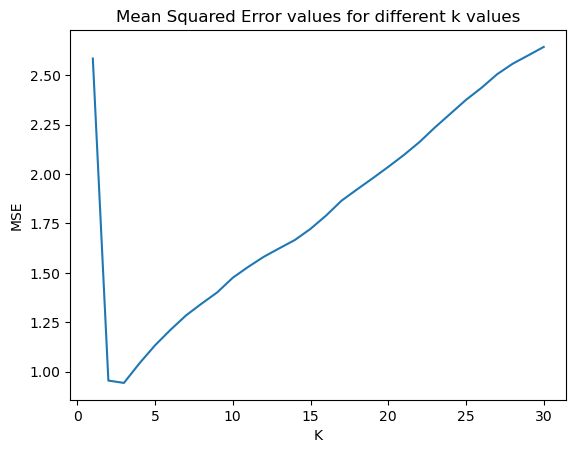

In [71]:
plt.plot(df['K'], df['MSE'])
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Mean Squared Error values for different k values')

Text(0.5, 1.0, 'Accuracy for different k values')

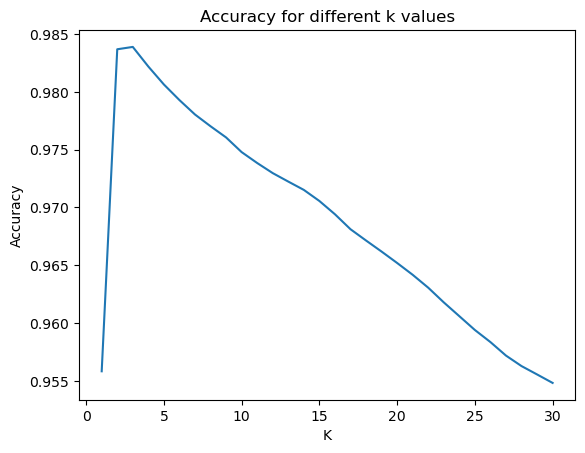

In [72]:
plt.plot(df['K'], df['test_acc'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy for different k values')

In [73]:
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [74]:
model = Sequential()
model.add(Dense(units = 256, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 42,497
Trainable params: 42,497
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [76]:
history=model.fit(x_train, y_train, epochs=100, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(x_test)

Epoch 1/100
1119/1119 [==============================] - 11s 2ms/step - loss: 46.8482 - mse: 46.8482 - mae: 5.2070 - val_loss: 28.9414 - val_mse: 28.9414 - val_mae: 3.7789
Epoch 2/100
1119/1119 [==============================] - 1s 1ms/step - loss: 24.5762 - mse: 24.5762 - mae: 3.4681 - val_loss: 21.9564 - val_mse: 21.9564 - val_mae: 3.1569
Epoch 3/100
1119/1119 [==============================] - 1s 1ms/step - loss: 18.9079 - mse: 18.9079 - mae: 2.8938 - val_loss: 15.9371 - val_mse: 15.9371 - val_mae: 2.4987
Epoch 4/100
1119/1119 [==============================] - 1s 1ms/step - loss: 12.0454 - mse: 12.0454 - mae: 2.1215 - val_loss: 8.3512 - val_mse: 8.3512 - val_mae: 1.5024
Epoch 5/100
1119/1119 [==============================] - 1s 1ms/step - loss: 6.5189 - mse: 6.5189 - mae: 1.4847 - val_loss: 4.5786 - val_mse: 4.5786 - val_mae: 1.2181
Epoch 6/100
1119/1119 [==============================] - 1s 1ms/step - loss: 4.6088 - mse: 4.6088 - mae: 1.2306 - val_loss: 3.6698 - val_mse: 3.6698 -

In [77]:
Neural_score = r2_score(y_test, predictions)
print("Testing Score: ", Neural_score)

mse = mean_squared_error(y_test, predictions)
print("mse value : ", mse)

Testing Score:  0.9656111002675518
mse value :  2.0121048338965513


In [78]:
fw = pd.DataFrame(np.arange(start=2.5, stop=3.0, step=0.05),columns=['fw'])
He = pd.DataFrame(np.arange(start=-3.0, stop=6.0, step=0.25),columns=['He'])
Rad = pd.DataFrame(np.arange(start=6.0, stop=10.0, step=0.25),columns=['Rad'])

In [79]:
Freq = pd.read_excel('freq_yash.xlsx')
Freq

,freq
0,2.000000
1,2.008889
2,2.017778
3,2.026667
4,2.035556
...,...
446,5.964444
447,5.973333
448,5.982222
449,5.991111


In [80]:
fw['tmp'] = 1
He['tmp'] = 1

new_dataset = pd.merge(fw, He, on=['tmp'])
new_dataset = new_dataset.drop('tmp', axis=1)
new_dataset

,fw,He
0,2.50,-3.00
1,2.50,-2.75
2,2.50,-2.50
3,2.50,-2.25
4,2.50,-2.00
...,...,...
355,2.95,4.75
356,2.95,5.00
357,2.95,5.25
358,2.95,5.50


In [81]:
new_dataset['tmp'] = 1
Rad['tmp'] = 1

new_dataset = pd.merge(new_dataset, Rad, on=['tmp'])
new_dataset = new_dataset.drop('tmp', axis=1)
new_dataset

,fw,He,Rad
0,2.50,-3.00,6.00
1,2.50,-3.00,6.25
2,2.50,-3.00,6.50
3,2.50,-3.00,6.75
4,2.50,-3.00,7.00
...,...,...,...
5755,2.95,5.75,8.75
5756,2.95,5.75,9.00
5757,2.95,5.75,9.25
5758,2.95,5.75,9.50


In [82]:
new_dataset['tmp'] = 1
Freq['tmp'] = 1

new_dataset = pd.merge(new_dataset, Freq, on=['tmp'])
new_dataset = new_dataset.drop('tmp', axis=1)
new_dataset


,fw,He,Rad,freq
0,2.50,-3.00,6.00,2.000000
1,2.50,-3.00,6.00,2.008889
2,2.50,-3.00,6.00,2.017778
3,2.50,-3.00,6.00,2.026667
4,2.50,-3.00,6.00,2.035556
...,...,...,...,...
2597755,2.95,5.75,9.75,5.964444
2597756,2.95,5.75,9.75,5.973333
2597757,2.95,5.75,9.75,5.982222
2597758,2.95,5.75,9.75,5.991111


In [83]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train ,y_train)
accuracies = r2_score(y_test, knn.predict(x_test))
mse = mean_squared_error(y_test,  knn.predict(x_test))

In [84]:
print("Accuracies = ",accuracies)
print("Mean Squared Error = ",mse)

Accuracies =  0.983677585854314
Mean Squared Error =  0.9550293454840383


In [85]:
y_pred = knn.predict(new_dataset)
y_pred

array([-8.76659136, -8.76659136, -8.76659136, ..., -5.51687901,
       -5.30673714, -5.30673714])

In [86]:
y_pred = pd.DataFrame(y_pred,columns=['s11'])
y_pred

,s11
0,-8.766591
1,-8.766591
2,-8.766591
3,-8.766591
4,-12.421922
...,...
2597755,-5.516879
2597756,-5.516879
2597757,-5.516879
2597758,-5.306737


In [87]:
dataset_with_predict = new_dataset.join(y_pred)
dataset_with_predict

,fw,He,Rad,freq,s11
0,2.50,-3.00,6.00,2.000000,-8.766591
1,2.50,-3.00,6.00,2.008889,-8.766591
2,2.50,-3.00,6.00,2.017778,-8.766591
3,2.50,-3.00,6.00,2.026667,-8.766591
4,2.50,-3.00,6.00,2.035556,-12.421922
...,...,...,...,...,...
2597755,2.95,5.75,9.75,5.964444,-5.516879
2597756,2.95,5.75,9.75,5.973333,-5.516879
2597757,2.95,5.75,9.75,5.982222,-5.516879
2597758,2.95,5.75,9.75,5.991111,-5.306737


In [91]:
np.min(y_pred['s11'])

-58.26942548767425

In [92]:
np.argmin(y_pred['s11'])

1295885

In [93]:
y_pred['s11'][1295885]

-58.26942548767425

In [94]:
new_dataset.loc[[1295885]]

,fw,He,Rad,freq
1295885,2.7,5.75,8.25,3.44
